### A Comprehensive Look at the Sucess of Premier League Teams Since 1992/1993

This projects aims to understand the success and performance of teams in the English Premier League since the 1992/1993 season. To elaborate upon their performance, this project will look at and provide interactive visualizations for the following:-

    1. Cummalative number of wins, losses and draws since the 1992/93 season
    2. Cummalative number of home and away goals since the 1992/93 season
    3. Cummalative number of wins, losses and draws since a variable starting season to the 2022/23 season
    4. Aggregate win % since the 1992/1993 season
    5. Aggregate win % since a variable starting season to the 2022/2023 season

In [90]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

Let's begin by introducing the dataset

In [91]:
data=pd.read_csv('premier_league_data.csv')
data

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR
0,1993,1,15/8/1992,Coventry City,2,1,Middlesbrough,H
1,1993,1,15/8/1992,Leeds United,2,1,Wimbledon,H
2,1993,1,15/8/1992,Sheffield Utd,2,1,Manchester Utd,H
3,1993,1,15/8/1992,Crystal Palace,3,3,Blackburn,D
4,1993,1,15/8/1992,Arsenal,2,4,Norwich City,A
...,...,...,...,...,...,...,...,...
12021,2023,38,28/5/2023,Everton,1,0,Bournemouth,H
12022,2023,38,28/5/2023,Leicester City,2,1,West Ham,H
12023,2023,38,28/5/2023,Aston Villa,2,1,Brighton,H
12024,2023,38,28/5/2023,Leeds United,1,4,Tottenham,A


Looking at the dataset, we immediately recognize that it's going to require a significant amount of work to convey the necessary information for our analysis. Let's start by formatting and reorganizing the data.

In [92]:
#Renaming the columns
data=data.set_index(data['Date'])
data.rename(columns={'FTR':'Winner'})
data

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR
Date,,,,,,,,
15/8/1992,1993,1,15/8/1992,Coventry City,2,1,Middlesbrough,H
15/8/1992,1993,1,15/8/1992,Leeds United,2,1,Wimbledon,H
15/8/1992,1993,1,15/8/1992,Sheffield Utd,2,1,Manchester Utd,H
15/8/1992,1993,1,15/8/1992,Crystal Palace,3,3,Blackburn,D
15/8/1992,1993,1,15/8/1992,Arsenal,2,4,Norwich City,A
...,...,...,...,...,...,...,...,...
28/5/2023,2023,38,28/5/2023,Everton,1,0,Bournemouth,H
28/5/2023,2023,38,28/5/2023,Leicester City,2,1,West Ham,H
28/5/2023,2023,38,28/5/2023,Aston Villa,2,1,Brighton,H


In [93]:
data=data.drop('Date',axis=1)

In [94]:
data

,Season_End_Year,Wk,Home,HomeGoals,AwayGoals,Away,FTR
Date,,,,,,,
15/8/1992,1993,1,Coventry City,2,1,Middlesbrough,H
15/8/1992,1993,1,Leeds United,2,1,Wimbledon,H
15/8/1992,1993,1,Sheffield Utd,2,1,Manchester Utd,H
15/8/1992,1993,1,Crystal Palace,3,3,Blackburn,D
15/8/1992,1993,1,Arsenal,2,4,Norwich City,A
...,...,...,...,...,...,...,...
28/5/2023,2023,38,Everton,1,0,Bournemouth,H
28/5/2023,2023,38,Leicester City,2,1,West Ham,H
28/5/2023,2023,38,Aston Villa,2,1,Brighton,H


This function is important as once it's applied to our dataset, it allows us to create a new column that contains the winners of each match. This is going to be crucial from a visualization point of view.

In [95]:
def create_new_column(row):
    if row['FTR'] == 'H':
        return row['Home']
    elif row['FTR'] == 'A':
        return row['Away']
    elif row['FTR'] == 'D':
        return 'Draw'
    else:
        return 'No Result'

data['Winner'] = data.apply(create_new_column, axis=1)


In [97]:
data

,Season_End_Year,Wk,Home,HomeGoals,AwayGoals,Away,FTR,Winner
Date,,,,,,,,
15/8/1992,1993,1,Coventry City,2,1,Middlesbrough,H,Coventry City
15/8/1992,1993,1,Leeds United,2,1,Wimbledon,H,Leeds United
15/8/1992,1993,1,Sheffield Utd,2,1,Manchester Utd,H,Sheffield Utd
15/8/1992,1993,1,Crystal Palace,3,3,Blackburn,D,Draw
15/8/1992,1993,1,Arsenal,2,4,Norwich City,A,Norwich City
...,...,...,...,...,...,...,...,...
28/5/2023,2023,38,Everton,1,0,Bournemouth,H,Everton
28/5/2023,2023,38,Leicester City,2,1,West Ham,H,Leicester City
28/5/2023,2023,38,Aston Villa,2,1,Brighton,H,Aston Villa


In [98]:
data_winner=pd.DataFrame(data=data['Winner'].value_counts())
data_winner=data_winner.drop('Draw',axis=0)

Here, we are able to calculate the total number of home, away and total matches each club has played.

In [99]:
data_away_matches=pd.DataFrame(data=data['Away'].value_counts())
data_away_matches=data_away_matches.rename(columns={'Away':'Away Matches Played'})

data_home_matches=pd.DataFrame(data=data['Home'].value_counts())

data_home_matches=data_home_matches.rename(columns={'Home':'Home Matches Played'})

data_total_matches=pd.concat([data_home_matches,data_away_matches],axis=1)
data_total_matches['Total Matches Played']=data_total_matches['Home Matches Played']*2

In [100]:
data_matches=pd.concat([data_total_matches,data_winner,data_total_draws],axis=1)
data_matches=data_matches.rename(columns={'Winner':'Wins'})

In [101]:
data_home_draws=pd.DataFrame(data.loc[data['Winner']=='Draw'].groupby('Home').size())
data_away_draws=pd.DataFrame(data.loc[data['Winner']=='Draw'].groupby('Away').size())
data_total_draws=data_home_draws+data_away_draws

In [106]:
data_matches['Aggregate Win (%)']=(data_matches['Wins']/data_matches['Total Matches Played'])*100
data_matches=data_matches.sort_values(by='Total Matches Played',ascending=False)
data_matches=data_matches.rename(columns={0:'Draws'})
data_matches['Losses']=data_matches['Total Matches Played']-data_matches['Wins']-data_matches['Draws']
data_matches['Aggregate Loss (%)']=(data_matches['Losses']/data_matches['Total Matches Played'])*100
data_matches['Aggregate Draw (%)']=(data_matches['Draws']/data_matches['Total Matches Played'])*100
data_matches

,Home Matches Played,Away Matches Played,Total Matches Played,Wins,Draws,Aggregate Win (%),Losses,Aggregate Loss (%),Aggregate Draw (%)
Manchester Utd,595,595,1190,726,263,61.008403,201,16.890756,22.100840
Liverpool,595,595,1190,628,292,52.773109,270,22.689076,24.537815
Everton,595,595,1190,426,332,35.798319,432,36.302521,27.899160
Tottenham,595,595,1190,520,287,43.697479,383,32.184874,24.117647
Chelsea,595,595,1190,629,295,52.857143,266,22.352941,24.789916
Arsenal,595,595,1190,645,290,54.201681,255,21.428571,24.369748
Aston Villa,538,538,1076,372,303,34.572491,401,37.267658,28.159851
Newcastle Utd,536,536,1072,401,278,37.406716,393,36.660448,25.932836
West Ham,517,517,1034,346,260,33.462282,428,41.392650,25.145068
Manchester City,500,500,1000,501,215,50.100000,284,28.400000,21.500000


Using the above 'data_matches' data frame, we proceed to create some interesting interactive visualization in the following sections of this project.

### Taking a Look at the Aggregate Performance of Clubs Since the 1992/1993 Season

#### 1. Wins, Losses and Draws

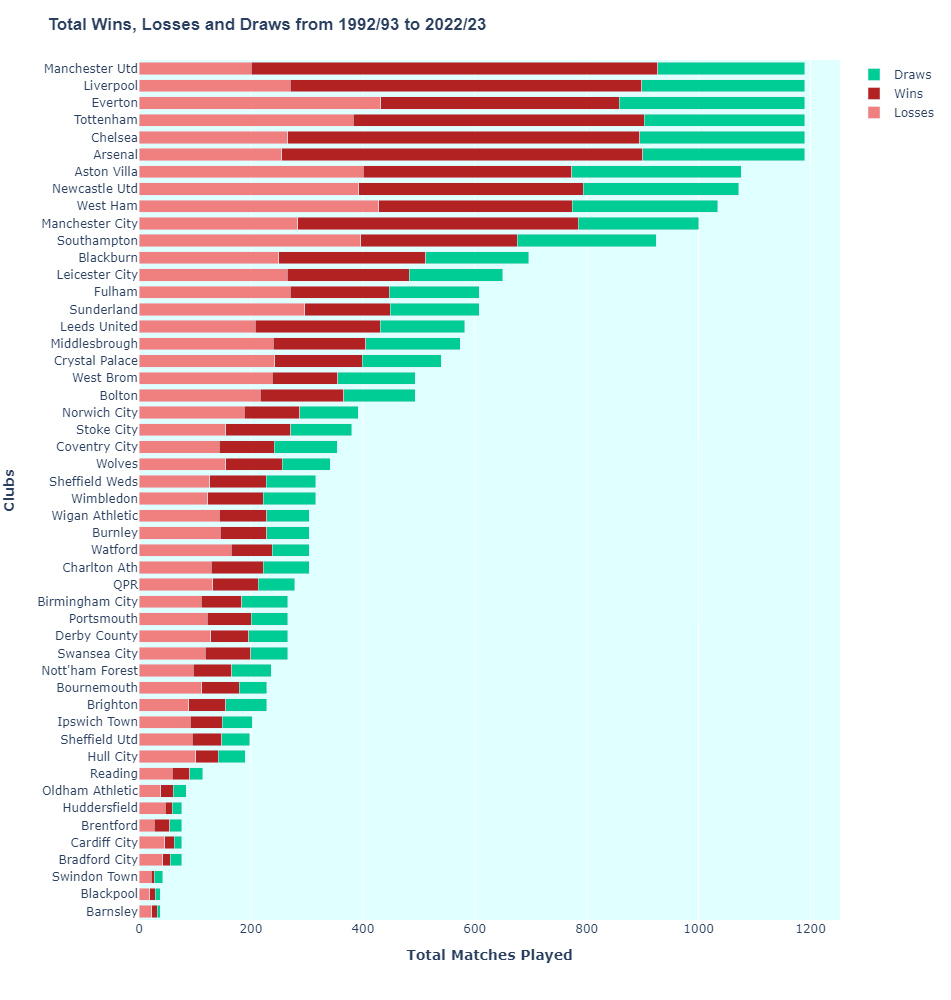

In [151]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True) 
import plotly.graph_objects as go
# Create a horizontal bar plot
fig = go.Figure()
data_matches=data_matches.sort_values(by='Total Matches Played',ascending=False)
data_matches=data_matches[::-1]
fig.add_trace(go.Bar(
    y=data_matches.index,
    x=data_matches['Losses'],
    name='Losses',
    orientation='h',
    marker=dict(color='lightcoral'),
    hovertemplate='<b>Matches Lost</b>: %{customdata}<extra></extra>',
    customdata=data_matches['Losses']
))

# Add the 'Wins' bar
fig.add_trace(go.Bar(
    y=data_matches.index,
    x=data_matches['Wins'],
    name='Wins',
    orientation='h',
    marker=dict(color='firebrick'),
    hovertemplate='<b>Matches Won</b>: %{x}<extra></extra>'
))

fig.add_trace(go.Bar(
    x=data_matches['Draws'],
    y=data_matches.index,
    name='Draws',
    orientation='h',
    hovertemplate='<b>Draws</b>: %{customdata}<extra></extra>',
    customdata=data_matches['Draws'],
))
    
# Set the layout
fig.update_layout(
    title=f'<b>Total Wins, Losses and Draws from 1992/93 to 2022/23</b>',
    xaxis_title='<b>Total Matches Played</b>',
    yaxis_title='<b>Clubs</b>',
    barmode='stack',
    bargap=0.1,
    bargroupgap=0.2,
    plot_bgcolor='lightcyan',
    title_font_family='Arial',
    height=1000,
    width=950,
    margin=dict(t=60,l=80))


# Show the legend
fig.update_layout(showlegend=True, legend=dict(orientation='v'))

# Show the plot
fig.show()


#### 2. Aggregate Win %

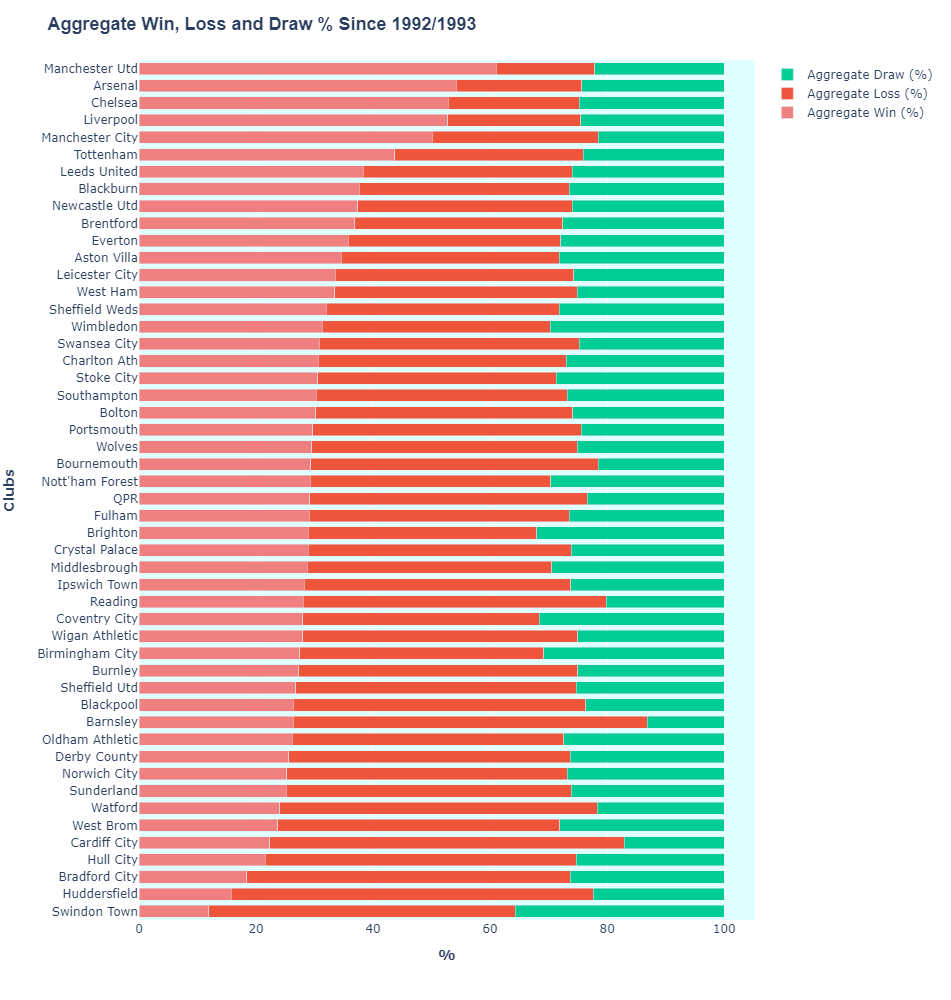

In [117]:
fig=go.Figure()
data_matches=data_matches.sort_values(by='Aggregate Win (%)',ascending=False)
data_matches=data_matches[::-1]
fig.add_trace(go.Bar(x=data_matches['Aggregate Win (%)'],
                     y=data_matches.index,
                     orientation='h',
                     name='Aggregate Win (%)',
                     marker=dict(color='lightcoral'),
                     hovertemplate='<b>Aggregate Win (%) </b>: %{x}<extra></extra>'))
fig.add_trace(go.Bar(
    x=data_matches['Aggregate Loss (%)'],
    y=data_matches.index,
    orientation='h',
    name='Aggregate Loss (%)',
    hovertemplate='<b>Aggregate Loss (%) </b>: %{customdata}<extra></extra>',
    customdata=data_matches['Aggregate Loss (%)']))

fig.add_trace(go.Bar(
    x=data_matches['Aggregate Draw (%)'],
    y=data_matches.index,
    orientation='h',
    name='Aggregate Draw (%)',
    hovertemplate='<b>Aggregate Draw (%) </b>: %{customdata}<extra></extra>',
    customdata=data_matches['Aggregate Draw (%)']))

fig.update_layout(
    title='<b>Aggregate Win, Loss and Draw % Since 1992/1993</b>',
    xaxis_title='<b>%</b>',
    yaxis_title='<b>Clubs</b>',
    bargap=0.3,
    barmode='stack',
    plot_bgcolor='lightcyan',
    height=1000,
    width=950,
    title_font_family='Arial',
    title_font_size=18,
    title_xanchor='left',
    margin=dict(t=60,l=80))

fig.show()
                     
                     

#### 3. Home and Away Goals Scored
To calculate the total number of home and away goals scored, we would have to perform some further data manipulations, particularly, perform the pivot table function and reorganize the results in another, more presentable data frame. The following code cells tackle this data manipulation.

In [118]:
data_goals=data.reset_index()

In [119]:
data_goals=data_goals.drop(['Date','Season_End_Year','Wk','FTR','Winner'],axis=1)

In [120]:
data_goals

,Home,HomeGoals,AwayGoals,Away
0,Coventry City,2,1,Middlesbrough
1,Leeds United,2,1,Wimbledon
2,Sheffield Utd,2,1,Manchester Utd
3,Crystal Palace,3,3,Blackburn
4,Arsenal,2,4,Norwich City
...,...,...,...,...
12021,Everton,1,0,Bournemouth
12022,Leicester City,2,1,West Ham
12023,Aston Villa,2,1,Brighton
12024,Leeds United,1,4,Tottenham


In [121]:
data_home_goals_scored=data_goals.pivot_table(index='Home',values='HomeGoals',aggfunc=sum)
data_home_goals_scored=data_home_goals_scored.rename(columns={'HomeGoals':'Total Goals Scored'})
data_home_goals_scored=data_home_goals_scored.sort_values(by='Total Goals Scored',ascending=False)

In [122]:
data_away_goals_scored=data_goals.pivot_table(index='Away',values='AwayGoals',aggfunc=sum)
data_away_goals_scored=data_away_goals_scored.rename(columns={'AwayGoals':'Total Goals Scored'})
data_away_goals_scored=data_away_goals_scored.sort_values(by='Total Goals Scored',ascending=False)

In [123]:
data_away_goals_scored=data_away_goals_scored.reset_index()

In [124]:
data_home_goals_scored=data_home_goals_scored.reset_index()

In [125]:
data_away_goals_scored.columns=['Team','Total Away Goals Scored']
data_home_goals_scored.columns=['Team','Total Home Goals Scored']

In [126]:
data_total_goals_scored=pd.merge(data_away_goals_scored,data_home_goals_scored,on='Team',how='inner')

In [127]:
data_total_goals_scored['Total Goals Scored']=data_total_goals_scored['Total Away Goals Scored']+data_total_goals_scored['Total Home Goals Scored']

In [128]:
data_total_goals_scored=data_total_goals_scored.set_index('Team')

In [129]:
data_total_goals_scored

,Total Away Goals Scored,Total Home Goals Scored,Total Goals Scored
Team,,,
Manchester Utd,993,1250,2243
Arsenal,898,1207,2105
Liverpool,894,1202,2096
Chelsea,870,1141,2011
Tottenham,783,1032,1815
Manchester City,735,1017,1752
Everton,628,897,1525
Aston Villa,599,717,1316
Newcastle Utd,578,867,1445


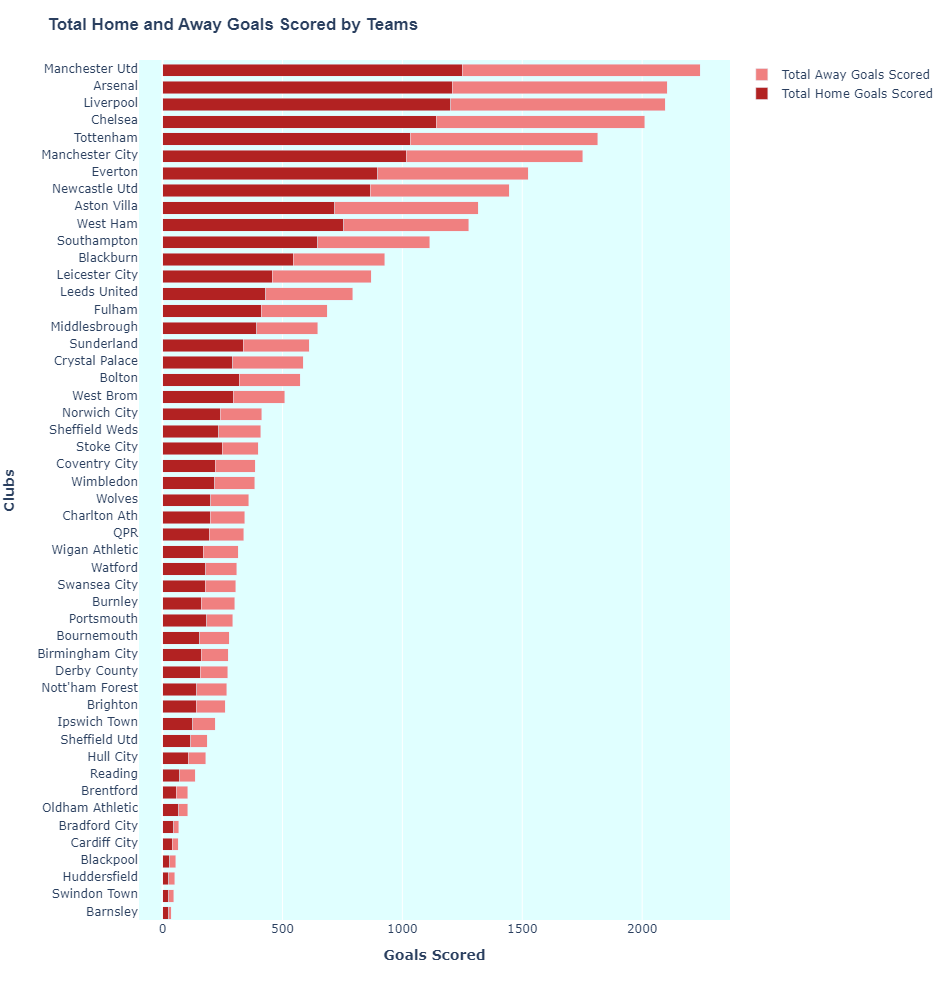

In [130]:
fig=go.Figure()
data_total_goals_scored=data_total_goals_scored.sort_values(by='Total Goals Scored', ascending=False)
data_total_goals_scored=data_total_goals_scored[::-1]

fig.add_trace(go.Bar(
    x=data_total_goals_scored['Total Home Goals Scored'],
    y=data_total_goals_scored.index,
    name='Total Home Goals Scored',
    orientation='h',
    marker=dict(color='firebrick'),
    hovertemplate='<b>Total Home Goals Scored</b>: %{x}<extra></extra>',
    offset=-0.455))
fig.add_trace(go.Bar(
    x=data_total_goals_scored['Total Away Goals Scored'],
    y=data_total_goals_scored.index,
    name='Total Away Goals Scored',
    orientation='h',
    marker=dict(color='lightcoral'),
    base=data_total_goals_scored['Total Home Goals Scored'],
    hovertemplate='<b>Total Away Goals Scored</b>: %{customdata}<extra></extra>',
    offset=-0.455,
    customdata=data_total_goals_scored['Total Away Goals Scored']))
fig.update_layout(
    title='<b>Total Home and Away Goals Scored by Teams</b>',
    xaxis_title='<b>Goals Scored</b>',
    yaxis_title='<b>Clubs</b>',
    barmode='stack',
    bargap=0.1,
    bargroupgap=0.2,
    plot_bgcolor='lightcyan',
    title_font_family='Arial',
    height=1000,
    width=950,
    margin=dict(t=60,l=80))

fig.update_layout(showlegend=True,legend=dict(orientation='v'))
fig.show()


### Taking a Look at the Performance of Teams Through Each Individual Season

In [131]:
data

,Season_End_Year,Wk,Home,HomeGoals,AwayGoals,Away,FTR,Winner
Date,,,,,,,,
15/8/1992,1993,1,Coventry City,2,1,Middlesbrough,H,Coventry City
15/8/1992,1993,1,Leeds United,2,1,Wimbledon,H,Leeds United
15/8/1992,1993,1,Sheffield Utd,2,1,Manchester Utd,H,Sheffield Utd
15/8/1992,1993,1,Crystal Palace,3,3,Blackburn,D,Draw
15/8/1992,1993,1,Arsenal,2,4,Norwich City,A,Norwich City
...,...,...,...,...,...,...,...,...
28/5/2023,2023,38,Everton,1,0,Bournemouth,H,Everton
28/5/2023,2023,38,Leicester City,2,1,West Ham,H,Leicester City
28/5/2023,2023,38,Aston Villa,2,1,Brighton,H,Aston Villa


Here, we generate a data frame of the total number of wins (both home and away) for each Premier League team in each season since the 1992/1993 season.

In [132]:
team_home_wins = data[data['Winner'] == data['Home']].groupby(['Home', 'Season_End_Year']).size().unstack(fill_value=0)
team_away_wins=data[data['Winner']==data['Away']].groupby(['Away','Season_End_Year']).size().unstack(fill_value=0)
total_wins=team_home_wins+team_away_wins
total_wins

Season_End_Year,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Home,,,,,,,,,,,,,,,,,,,,,
Arsenal,15,18,13,17,19,23,22,22,20,26,...,24,22,20,23,19,21,14,18,22,26
Aston Villa,21,15,11,18,17,17,15,15,13,12,...,10,10,3,0,0,0,9,16,13,18
Barnsley,0,0,0,0,0,10,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Birmingham City,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Blackburn,20,25,27,18,9,16,7,0,0,12,...,0,0,0,0,0,0,0,0,0,0
Blackpool,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bolton,0,0,0,8,0,9,0,0,0,9,...,0,0,0,0,0,0,0,0,0,0
Bournemouth,0,0,0,0,0,0,0,0,0,0,...,0,0,11,12,11,13,9,0,0,11
Bradford City,0,0,0,0,0,0,0,9,5,0,...,0,0,0,0,0,0,0,0,0,0


To gain a more thorough understanding of team's season performance, we also look at the total number of home and away draws and aggregate them through the code below.

In [133]:
total_home_draws = data[data['Winner'] == 'Draw'].groupby(['Home', 'Season_End_Year']).size().unstack(fill_value=0)
total_away_draws=data[data['Winner']=='Draw'].groupby(['Away','Season_End_Year']).size().unstack(fill_value=0)
total_draws=total_home_draws+total_away_draws


In [134]:
# This dataframe contains the total number of matches played by the teams in each season
matches_played=data[['Season_End_Year','Home']].groupby(['Season_End_Year','Home']).size().unstack(fill_value=0).transpose()+data[['Season_End_Year','Away']].groupby(['Season_End_Year','Away']).size().unstack(fill_value=0).transpose()
matches_played

Season_End_Year,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Home,,,,,,,,,,,,,,,,,,,,,
Arsenal,42,42,42,38,38,38,38,38,38,38,...,38,38,38,38,38,38,38,38,38,38
Aston Villa,42,42,42,38,38,38,38,38,38,38,...,38,38,38,0,0,0,38,38,38,38
Barnsley,0,0,0,0,0,38,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Birmingham City,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Blackburn,42,42,42,38,38,38,38,0,0,38,...,0,0,0,0,0,0,0,0,0,0
Blackpool,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bolton,0,0,0,38,0,38,0,0,0,38,...,0,0,0,0,0,0,0,0,0,0
Bournemouth,0,0,0,0,0,0,0,0,0,0,...,0,0,38,38,38,38,38,0,0,38
Bradford City,0,0,0,0,0,0,0,38,38,0,...,0,0,0,0,0,0,0,0,0,0


In [135]:
total_losses=matches_played-total_wins-total_draws

### Taking a Look at the Performance of Clubs from a Variable Starting Season to the 2022/2023 Season

#### 1. Wins, Losses and Draws from a Variable Starting Season to the 2022/2023 Season

This interactive visualization allows us to set the starting year (season) and look at the total number of wins, losses and draws from that year to the 2022/2023 season. This is especially important to account for the performance of clubs over the years and evaluate whether there is a positive or negative trend in their performance over time. 

In [136]:
def win(year):
    value=total_wins.loc[:,year:].cumsum(axis=1).sort_values(by=2023,ascending=True)
    value_1=total_losses.loc[:,year:].cumsum(axis=1).sort_values(by=2023,ascending=True)
    value_2=total_draws.loc[:,year:].cumsum(axis=1).sort_values(by=2023,ascending=True)
    fig=go.Figure()
    
    fig.add_trace(go.Bar(
        x=value[2023],
        y=value.index,
        name=f'Total Wins Since {year-1}/{year}',
        orientation='h',
        hovertemplate=f'<b>Total Wins Since/{year-1}/{year}</b>: %{{x}}<extra></extra>'
        ))
        
    fig.add_trace(go.Bar(
        x=value_1[2023],
        y=value_1.index,
        customdata=value_1[2023],
        name=f'Total Losses Since {year-1}/{year}',
        orientation='h',
        hovertemplate=f'Total Losses Since {year-1}/{year}: </b>%{{customdata}}<extra></extra>',
        marker=dict(color='lightcoral')))
    
    fig.add_trace(go.Bar(
        x=value_2[2023],
        y=value_2.index,
        customdata=value_2[2023],
        name=f'Total Draws Since {year-1}/{year}',
        orientation='h',
        hovertemplate=f'Total Draws Since {year-1}/{year}: </b>%{{customdata}}<extra></extra>',
        marker=dict(color='Firebrick'),
        ))
   
    
    fig.update_layout(
    title=f'<b>Total Wins,Losses and Draws from {year-1}/{year} to 2022/23</b>',
    xaxis_title='<b>Total Matches Played</b>',
    yaxis_title='<b>Clubs</b>',
    barmode='stack',
    bargap=0.1,
    bargroupgap=0.2,
    plot_bgcolor='lightcyan',
    title_font_family='Arial',
    height=1000,
    width=950,
    margin=dict(t=60,l=80))
    
    
    fig.show()


In [74]:
import ipywidgets as widgets
widgets.interact(win,year=(1993,2023,1))

interactive(children=(IntSlider(value=2008, description='year', max=2023, min=1993), Output()), _dom_classes=(…

<function __main__.win(year)>

#### 2. Aggregate Win, Loss and Draw % Across the Seasons

In [148]:
agg_win_percentage=(total_wins/matches_played)*100
agg_win_percentage=agg_win_percentage.fillna(0)

agg_loss_percentage=(total_losses/matches_played)*100
agg_loss_percentage=agg_loss_percentage.fillna(0)

agg_draw_percentage=(total_draws/matches_played)*100
agg_draw_percentage=agg_draw_percentage.fillna(0)

In [149]:
def win_percent(year):
    matches_win=agg_win_percentage.sort_values(by=year,ascending=True)
    matches_loss=agg_loss_percentage.sort_values(by=year,ascending=True)
    matches_draw=agg_draw_percentage.sort_values(by=year,ascending=True)
    
    fig=go.Figure()
    fig.add_trace(go.Bar(
        x=matches_win[year],
        y=matches_win.index,
        orientation='h',
        name=f'Win % in {year}',
        hovertemplate=f'<b>Win % in {year}</b>: %{{x}}<extra></extra>'))
    fig.add_trace(go.Bar(
        x=matches_loss[year],
        y=matches_loss.index,
        orientation='h',
        name=f'Loss % in {year}',
        hovertemplate=f'<b>Loss % in {year}</b>: %{{x}}<extra></extra>'))
    fig.add_trace(go.Bar(
        x=matches_draw[year],
        y=matches_draw.index,
        orientation='h',
        name=f'Draw % in {year}',
        hovertemplate=f'<b>Draw % in {year}</b>: %{{x}}<extra></extra>'))
    
    fig.update_layout(
    title=f'<b>Aggregate Win % in the {year-1}/{year} Season </b>',
    xaxis_title='<b>Win Percentage (%)</b>',
    yaxis_title='<b>Clubs</b>',
    barmode='stack',
    bargap=0.1,
    bargroupgap=0.2,
    plot_bgcolor='lightcyan',
    title_font_family='Arial',
    height=1000,
    width=950,
    margin=dict(t=60,l=80))
    fig.show()
        

In [150]:
widgets.interact(win_percent,year=(1993,2023,1))

interactive(children=(IntSlider(value=2008, description='year', max=2023, min=1993), Output()), _dom_classes=(…

<function __main__.win_percent(year)>